<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/05_DL_Podstawy/01_Wstep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth = 120)
print(tf.__version__)

2.2.0


# Załadowanie i przygotowanie danych

In [15]:
(X_train, y_train), (X_test, y_test) = load_data()

print(X_train.shape)
print(y_test.shape)
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)
(60000, 28, 28)
(10000,)


In [24]:
print(X_train[122])
print(y_train[122])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  39 228 254 224  35   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 206 253 253 253 222  97   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 106  46 142 222 251 137   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  41 221 250  84   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 253 140   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 253 220   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 253 231  3

In [0]:
X_train = X_train / 255
X_test = X_test / 255

# Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

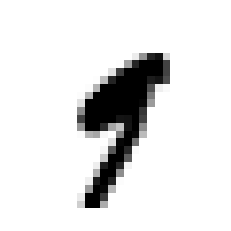

In [30]:
plt.imshow(X_train[8847], cmap = 'gray_r')
plt.axis('off')

In [0]:
plt.figure(Fsize = (13, 13))

# Budowa modelu

In [36]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trenowanie modelu

In [38]:
history = model.fit(X_train, y_train, epochs = 10)
# epchos - ile razy zbió danych przejdzie przez sieć

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.9067
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3012 - accuracy: 0.9118
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.9175
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9249
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9280
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2370 - accuracy: 0.9323
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2264 - accuracy: 0.9343
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2174 - accuracy: 0.9368
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.209

# Ocena modelu

In [39]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.1850 - accuracy: 0.9457


[0.18498894572257996, 0.9456999897956848]

In [40]:
# metryki trenowania
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.320123,0.906683
1,0.301187,0.911833
2,0.285515,0.917533
3,0.270413,0.921233
4,0.259096,0.924867
5,0.247545,0.928050
6,0.236991,0.932250
7,0.226352,0.934333
8,0.217435,0.936783
9,0.209645,0.939983


In [41]:

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

# Predykcja na podstawie modelu

In [42]:
model.predict(X_test)

array([[0.00009023217 , 0.000000005068, 0.00019385986 , ..., 0.9976539     , 0.000012430284, 0.000257024   ],
       [0.00015355748 , 0.000027095823, 0.9931404     , ..., 0.000000000017, 0.00051119237 , 0.000000000062],
       [0.000001007751, 0.9863236     , 0.0042025098  , ..., 0.0040532677  , 0.002805054   , 0.00011567483 ],
       ...,
       [0.000000003749, 0.000000173993, 0.00000050896 , ..., 0.00029802925 , 0.0031767148  , 0.012214615   ],
       [0.000037702343, 0.000024594923, 0.000001584778, ..., 0.000000700531, 0.039577056   , 0.000001085957],
       [0.00005649612 , 0.000000000031, 0.00023858454 , ..., 0.000000000493, 0.000000214101, 0.000000011792]],
      dtype=float32)

In [43]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [44]:
pred = pd.concat([pd.DataFrame(y_test, columns = ['y_test']), pd.DataFrame(y_pred, columns = ['y_pred'])], axis =1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [46]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([8, 33, 92, 149, 151, 195, 217, 233, 241, 247], dtype='int64')

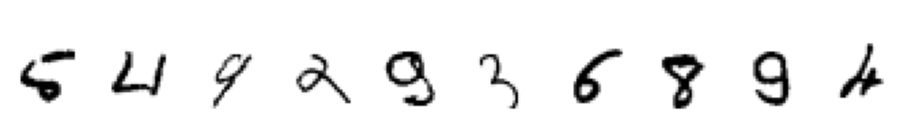

In [47]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()